In [29]:
def regression():
    # Importing libraries
    import pandas as pd
    import numpy as np
    from datetime import datetime
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler
    from sklearn.linear_model import LinearRegression
    from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
    import seaborn as sns
    import matplotlib.pyplot as plt
    import pickle
    import warnings 
    warnings.simplefilter('ignore')

    # Loading data
    df = pd.read_csv('SolarPrediction.csv')

    data = df

    # Converting UNIX time to datetime object
    data['Date']= pd.to_datetime(data['UNIXTime'],unit='s')

    # Setting the right timezone to the datetime object
    data['Date'] = data['Date'].dt.tz_localize('UTC').dt.tz_convert('HST')

    # Extracting date from Data column
    data['Data'] = pd.to_datetime(data['Data']).dt.date

    #Converting Sunrise and Sunset columns into datetime.time objects
    data['TimeSunRise'] = pd.to_datetime(data['TimeSunRise']).dt.time
    data['TimeSunSet'] = pd.to_datetime(data['TimeSunSet']).dt.time

    #Creating new sunset/sunrise columns featuring also the right date
    data['sunrise_time'] = data.apply(lambda row: pd.datetime.combine(row['Data'], row['TimeSunRise']), axis = 1)
    data['sunset_time'] = data.apply(lambda row: pd.datetime.combine(row['Data'], row['TimeSunSet']), axis = 1)

    #Adding approriate timezone
    data['sunrise_time'] = data['sunrise_time'].dt.tz_localize('HST')
    data['sunset_time'] = data['sunset_time'].dt.tz_localize('HST')

    # Setting Date as index, sorting and dropping columns
    data.set_index('Date', inplace = True)

    data.sort_index()

    data.drop(columns = ['Data', 'Time', 'TimeSunRise', 'TimeSunSet'], inplace = True)

    # Converting sunrise and sunset times into timestamp
    data['sunrise_timestamp'] = data.apply(lambda row: datetime.timestamp(row['sunrise_time']), axis = 1)
    data['sunset_timestamp'] = data.apply(lambda row: datetime.timestamp(row['sunset_time']), axis = 1)

    # Creating a column containing the number of daily light hours
    data['Hours_of_light'] = (data['sunset_timestamp'] - data['sunrise_timestamp'])/60/60

    # Creating column describing current time relative to sunrise/sunset
    data['Rel_time'] = (data['UNIXTime']- data['sunrise_timestamp'])/(data['sunset_timestamp']-data['sunrise_timestamp'])

    # Removing non-necessary columns
    data.drop(columns = ['UNIXTime','sunrise_timestamp', 'sunset_timestamp', 
                         'sunset_time', 'sunrise_time'], inplace = True)

    # Modeling

    df = data

    # Splitting dfset into targets and features
    X = df.drop(columns = 'Radiation')
    y = df.Radiation

    # Splitting df into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scaling df
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Training models
    models = {'Linear Regression': LinearRegression()}

    for name, model in models.items():
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)

        # Evaluating performance
        r2 = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))

        # Printing results
        print(f"{name}: R^2={r2:.3f}, MAE={mae:.3f}, RMSE={rmse:.3f}")

        # Plotting predicted vs. actual values
        plt.figure()
        sns.scatterplot(x=y_test, y=y_pred)
        plt.xlabel('Actual Solar Radiation')
        plt.ylabel('Predicted Solar Radiation')
        plt.title(name)


Linear Regression: R^2=0.614, MAE=148.521, RMSE=195.899
         6833819 function calls (6832457 primitive calls) in 5.005 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
       35    0.391    0.011    0.391    0.011 {pandas._libs.tslibs.vectorized.ints_to_pydatetime}
   196116    0.354    0.000    1.692    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\series.py:928(__getitem__)
  322/316    0.293    0.001    0.464    0.001 {built-in method numpy.array}
   196116    0.242    0.000    1.169    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\series.py:1034(_get_value)
   261691    0.231    0.000    0.755    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCach

       35    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\array_algos\take.py:517(_take_preprocess_indexer_and_fill_value)
      161    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\dtypes\common.py:1420(is_extension_array_dtype)
      104    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\internals\managers.py:1539(__init__)
      192    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\artist.py:81(_stale_axes_callback)
       45    0.000    0.000 

       68    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\text.py:1209(set_text)
       24    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\internals\managers.py:250(<listcomp>)
       32    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\dtypes\inference.py:184(is_array_like)
       14    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\arrays\datetimelike.py:1878(maybe_infer_freq)
       12    0.000    0.000    0.000    0.000 C:\Users\srimo\AppDat

        1    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\linalg\lapack.py:994(_compute_lwork)
        1    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\relational.py:195(add_legend_data)
        9    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\dtypes\dtypes.py:777(name)
        7    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\computation\expressions.py:92(_evaluate_numexpr)
       18    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local

        2    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\dtypes\dtypes.py:300(construct_from_string)
        1    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\sorting.py:510(ensure_key_mapped)
        1    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\preprocessing\_data.py:763(__init__)
        1    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\pyplot.py:3031(xlabel)
        2    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Pack

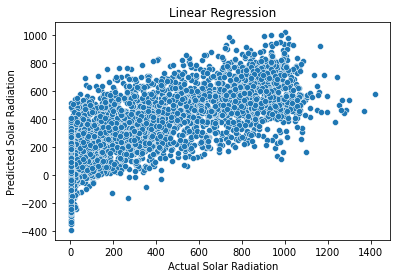

In [30]:
import cProfile,pstats

# Initializing profile class and calling rf function
profiler = cProfile.Profile()
profiler.enable()
regression()
profiler.disable()
stats = pstats.Stats(profiler).sort_stats('tottime')

# Print the stats report
stats.print_stats()  

In [31]:
stats = pstats.Stats(profiler).sort_stats('cumtime')
stats.print_stats()

         6833819 function calls (6832457 primitive calls) in 5.005 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        2    0.000    0.000    5.004    2.502 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\interactiveshell.py:3325(run_code)
        2    0.000    0.000    5.004    2.502 {built-in method builtins.exec}
        1    0.001    0.001    5.004    5.004 C:\Users\srimo\AppData\Local\Temp\ipykernel_2424\4176585079.py:1(<cell line: 6>)
        1    0.019    0.019    5.004    5.004 C:\Users\srimo\AppData\Local\Temp\ipykernel_2424\506562856.py:1(regression)
        4    0.000    0.000    4.654    1.163 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\frame.py:8583(apply)
        4    0.002    0.000    4.654    1.

       53    0.000    0.000    0.001    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\text.py:936(set_color)
        4    0.000    0.000    0.001    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\generic.py:5661(astype)
        3    0.000    0.000    0.001    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\indexes\base.py:5991(drop)
        4    0.000    0.000    0.001    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\spines.py:219(clear)
       30    0.000    0.000    0.001    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.1

        4    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\axis.py:1546(set_label_text)
      304    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\font_manager.py:1022(_normalize_font_family)
        1    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\nanops.py:396(new_func)
        1    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\frame.py:5810(isna)
       24    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwa

        5    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\arrays\datetimes.py:490(_unbox_scalar)
       60    0.000    0.000    0.000    0.000 {built-in method builtins.max}
        7    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\shape_base.py:23(atleast_1d)
        1    0.000    0.000    0.000    0.000 <__array_function__ internals>:177(broadcast_to)
       10    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\internals\blocks.py:293(_slice)
        7    0.000    0.000    0.000    0.000 <__array_function__ internals>:177(bincount)
        7    0.000    0.000    0.000    0.000 C

       32    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\axis.py:703(isDefault_minloc)
        4    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\indexes\base.py:6339(ensure_has_len)
        4    0.000    0.000    0.000    0.000 {built-in method pandas._libs.tslibs.timezones.is_utc}
       10    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\frame.py:564(_constructor)
        1    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\io\parsers\base_parser.

The snakeviz extension is already loaded. To reload it, use:
  %reload_ext snakeviz
Linear Regression: R^2=0.614, MAE=148.521, RMSE=195.899
 
*** Profile stats marshalled to file 'C:\\Users\\srimo\\AppData\\Local\\Temp\\tmpdj31tfug'.
Embedding SnakeViz in this document...


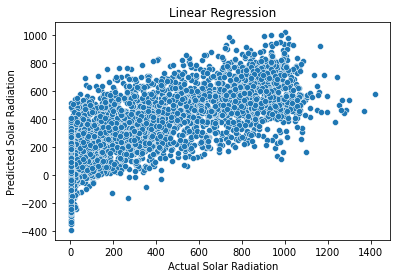

In [32]:
%load_ext snakeviz
%snakeviz regression()